<a href="https://colab.research.google.com/github/yihong1011/TibameML/blob/main/07_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 載入cifar10

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
trans =[
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

編號 31986 的答案是: truck


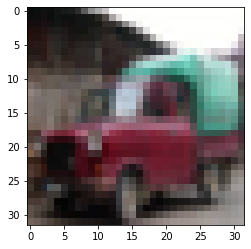

In [6]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0,50000)
print("編號",idx,"的答案是:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D
layers_test = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape = (32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax")
]
model_test = Sequential(layers_test)
model_test.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 4, 4, 256)       

In [14]:
layers = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape = (32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 256)       

In [20]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [21]:
# batch_size: 你看多少筆再進行一次梯度下降(5[圖片大/訓練資料少]-200[圖片小/訓練資料多])
# epochs: 全體資料(60000) 你要看幾輪(我們什麼時候要停的關鍵)
# validation_split: 測試什麼時候停下來要用沒看過的資料(val loss穩定的時候就停, 不要過擬合)
# (60000 * 0.9) / 200 -> 270
# verbose: 0(quiet) 1(full) 2(no progress bar)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 16s - loss: 1.8310 - accuracy: 0.3210 - val_loss: 1.6010 - val_accuracy: 0.4100 - 16s/epoch - 69ms/step
Epoch 2/50
225/225 - 3s - loss: 1.5176 - accuracy: 0.4497 - val_loss: 1.4538 - val_accuracy: 0.4712 - 3s/epoch - 15ms/step
Epoch 3/50
225/225 - 3s - loss: 1.3794 - accuracy: 0.5082 - val_loss: 1.3263 - val_accuracy: 0.5246 - 3s/epoch - 15ms/step
Epoch 4/50
225/225 - 3s - loss: 1.2763 - accuracy: 0.5457 - val_loss: 1.2424 - val_accuracy: 0.5556 - 3s/epoch - 15ms/step
Epoch 5/50
225/225 - 3s - loss: 1.2052 - accuracy: 0.5725 - val_loss: 1.1500 - val_accuracy: 0.5912 - 3s/epoch - 15ms/step
Epoch 6/50
225/225 - 3s - loss: 1.1474 - accuracy: 0.5968 - val_loss: 1.0740 - val_accuracy: 0.6236 - 3s/epoch - 15ms/step
Epoch 7/50
225/225 - 3s - loss: 1.0947 - accuracy: 0.6170 - val_loss: 1.0703 - val_accuracy: 0.6236 - 3s/epoch - 15ms/step
Epoch 8/50
225/225 - 3s - loss: 1.0374 - accuracy: 0.6378 - val_loss: 1.0277 - val_accuracy: 0.6426 - 3s/epoch - 15ms/step
Epoch 9/50
225